In [7]:
import pandas as pd
from sodapy import Socrata

#Se extrae la data de datos.gov.co para pruebas y casos por medio de una api
#Se define las pruebas y los casos como data frame

def data(lim):
    
    client = Socrata("www.datos.gov.co", None)
    
    pruebas_api = client.get("8835-5baf", limit=lim)
    df_pruebas = pd.DataFrame.from_records(pruebas_api)
    
    del pruebas_api
    


    casos_api = client.get("gt2j-8ykr", limit=lim)
    df_casos = pd.DataFrame.from_records(casos_api)

    del casos_api
      
    return df_pruebas, df_casos

#Se lee el archivo de excel extraido del Dane para obtener la proyección de poblacion por ciudades.

#Se realiza una limpieza de los datos

def poblacion(ruta):
    # Lectura de datos
    df = pd.read_excel(ruta, sheet_name='PPO_GQEdad_DPTO')
    
    # se extraen los códigos de cada departamento
    codigos = df[df['Codigo'].notna()][['Codigo','Grupos de edad']]
    codigos.columns = ['Codigo','Región']
    
    # se llenan los NA con el código inmediatamente anterior
    df['Codigo'] = df['Codigo'].fillna(method='ffill')
    
    # se eliminan las filas de los títulos de los departamentos
    # y las filas del final que traen NA
    df = df.dropna()
    
    # se hace un merge para tener los nombres de los departamentos
    df = pd.merge(df,codigos,on='Codigo',how='left')
    
    return df

In [2]:
pruebas, casos = data(1000000)

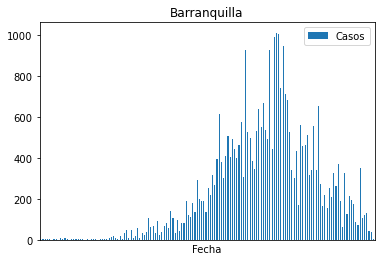

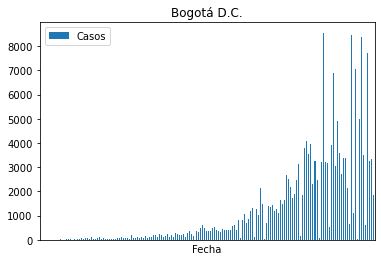

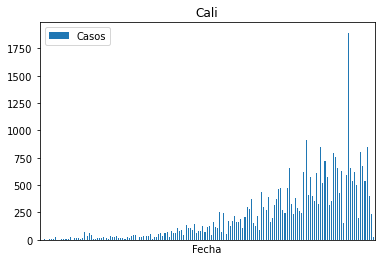

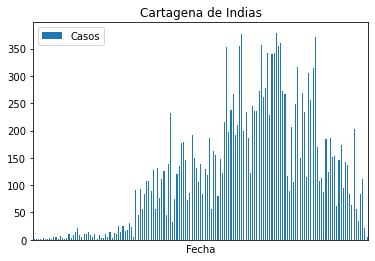

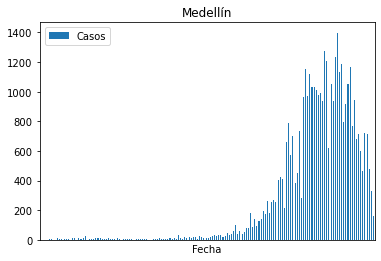

In [6]:
#Se define la variable Ciudades con las 5 ciudades principales
#Se define curva de casos como una serie de tiempo de los casos por ciudad
#Se agrupan los casos con la fecha de diagnostico y la ciudad de ubicación
#Se cambian las fechas por un indice que es el numero de fechas de diagnostico que se tiene


ciudades = ['Bogotá D.C.', 'Medellín', 'Cali', 'Barranquilla', 'Cartagena de Indias']
curvas = casos[casos['ciudad_de_ubicaci_n'].isin(ciudades)]

curvas = curvas.groupby(['fecha_diagnostico','ciudad_de_ubicaci_n'])['fecha_diagnostico'].size().reset_index(name='Casos')
curvas.columns = ['Fecha','Ciudad','Casos']

#Se grafican los casos nuevos diarios por cada ciudad

for curva, df in curvas.groupby('Ciudad'):
    df.plot.bar(x = 'Fecha', title = curva, xticks = [])